In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [2]:
# Setze oder erstelle das Experiment
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("intro_experiment-02")


<Experiment: artifact_location='mlflow-artifacts:/575863531195443798', creation_time=1728823088176, experiment_id='575863531195443798', last_update_time=1728823088176, lifecycle_stage='active', name='intro_experiment-02', tags={}>

In [3]:
# Logge einige Beispielparameter
params = {"depth-random-forest": 3, 
          "size-forest": 10}
mlflow.log_params(params)
print("Parameter wurden geloggt.")


Parameter wurden geloggt.


In [4]:
## Beispielhafte Daten
#y_true = np.random.rand(100)
#y_pred = y_true + np.random.normal(0, 0.1, 100)  # ein wenig Rauschen hinzufügen
#
## MSE Berechnung
#mse = mean_squared_error(y_true, y_pred)
#
## Logge die MSE-Metrik
#mlflow.log_metric("mean_squared_error", mse)
#print("Metrik 'mean_squared_error' wurde geloggt.")
#

In [5]:
import mlflow
import numpy as np

# Anzahl der Epochen für die Simulation
epochs = 50
 
for epoch in range(epochs):
    # Abnehmender Verlauf (Loss)
    simulated_loss = np.exp(-0.1 * epoch) + np.random.normal(0, 0.01)
    mlflow.log_metric("train data loss", simulated_loss, step=epoch)
    # Stetiger Verlauf (Accuracy bleibt stabil um 0.75)
    simulated_accuracy = 0.75 + np.random.normal(0, 0.02)
    mlflow.log_metric("accuracy", simulated_accuracy, step=epoch)
    # Schwankender Verlauf (z.B. Val_Loss mit leichten Schwankungen)
    simulated_val_loss = 0.5 + 0.1 * np.sin(0.3 * epoch) + np.random.normal(0, 0.01)
    mlflow.log_metric("test data loss", simulated_val_loss, step=epoch)
    # Zufälliger Verlauf (z.B. F1-Score, der im Laufe der Zeit leicht zunimmt)
    simulated_f1 = 0.5 + 0.01 * epoch + np.random.normal(0, 0.02)
    mlflow.log_metric("f1_score", simulated_f1, step=epoch)
print("Simulierte Metriken mit unterschiedlichen Verläufen wurden erfolgreich geloggt.")

Simulierte Metriken mit unterschiedlichen Verläufen wurden erfolgreich geloggt.


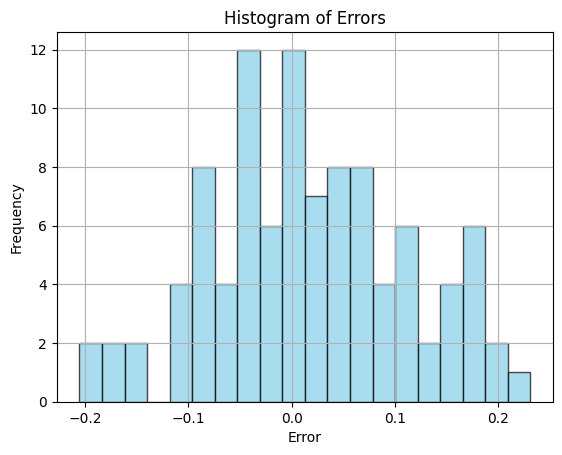

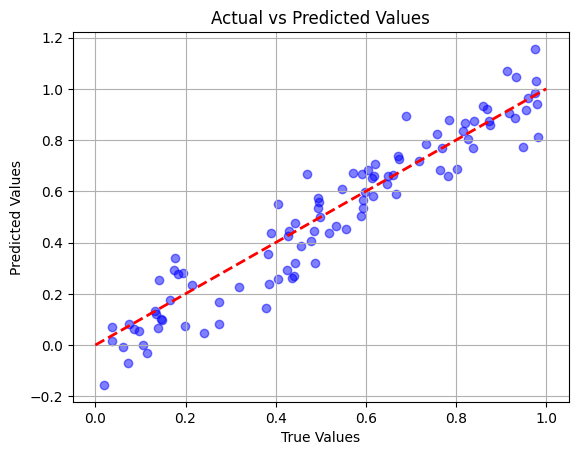

Plots und Metriken wurden erfolgreich geloggt.


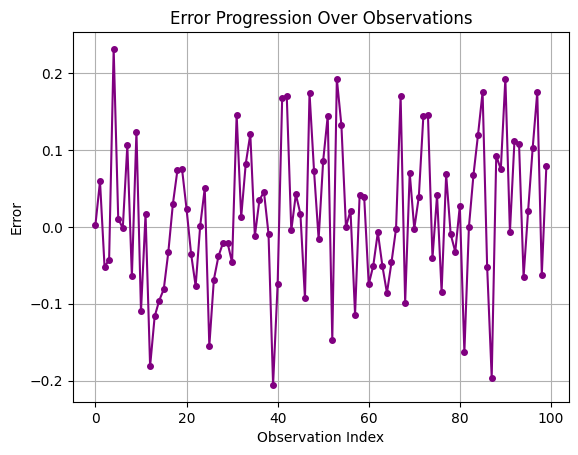

In [6]:
# Beispielhafte Daten generieren
y_true = np.random.rand(100)
y_pred = y_true + np.random.normal(0, 0.1, 100)  # ein wenig Rauschen hinzufügen
errors = y_true - y_pred
mse = mean_squared_error(y_true, y_pred)
mae = np.mean(np.abs(errors))
error_std = np.std(errors)

# Metriken loggen, um sie in der Model Metrics UI anzuzeigen
mlflow.log_metric("mean_squared_error", mse)
mlflow.log_metric("mean_absolute_error", mae)
mlflow.log_metric("error_standard_deviation", error_std)

# 1. Fehlerverteilung (Histogramm) erstellen und als Artefakt speichern
plt.figure()
plt.hist(errors, bins=20, alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Histogram of Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt_path_hist = "error_histogram.png"
plt.savefig(plt_path_hist)
mlflow.log_artifact(plt_path_hist)
plt.show()

# 2. Scatterplot für tatsächliche vs. vorhergesagte Werte
plt.figure()
plt.scatter(y_true, y_pred, color="blue", alpha=0.5)
plt.plot([0, 1], [0, 1], "r--", linewidth=2)  # Diagonale Linie für perfekte Übereinstimmung
plt.title("Actual vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt_path_scatter = "actual_vs_predicted.png"
plt.savefig(plt_path_scatter)
mlflow.log_artifact(plt_path_scatter)
plt.show()

# 3. Liniendiagramm der Fehlerentwicklung
plt.figure()
plt.plot(errors, marker="o", linestyle="-", color="purple", markersize=4)
plt.title("Error Progression Over Observations")
plt.xlabel("Observation Index")
plt.ylabel("Error")
plt.grid(True)
plt_path_line = "error_progression.png"
plt.savefig(plt_path_line)
mlflow.log_artifact(plt_path_line)
#plt.show()

# Berechnete Daten als CSV-Datei speichern und hochladen
data = pd.DataFrame({"y_true": y_true, "y_pred": y_pred, "errors": errors})
table_path = "data_table.csv"
data.to_csv(table_path, index=False)
mlflow.log_artifact(table_path)

print("Plots und Metriken wurden erfolgreich geloggt.")

Simulierte Metriken mit unterschiedlichen Verläufen wurden erfolgreich geloggt.


In [7]:

# Setze Zufallsgenerator für reproduzierbare Ergebnisse
np.random.seed(42)

# Generiere die Features
n_samples = 200
living_area = np.random.normal(100, 20, n_samples).round(1)  # Wohnfläche in qm
rooms = np.random.randint(1, 6, n_samples)  # Anzahl der Zimmer
year_built = np.random.randint(1950, 2022, n_samples)  # Baujahr
distance_to_city = np.abs(np.random.normal(10, 5, n_samples)).round(1)  # Entfernung zum Stadtzentrum in km

# Zielwert (Preis in Tausend Euro) basierend auf den anderen Features
# Je größer die Fläche und je näher am Stadtzentrum, desto höher der Preis
price = (living_area * 1.5 + rooms * 20 + (2023 - year_built) * -1.2 + (15 - distance_to_city) * 3
         + np.random.normal(0, 10, n_samples)).round(1)

# Erstelle den DataFrame
data = pd.DataFrame({
    "living_area_sqm": living_area,
    "rooms": rooms,
    "year_built": year_built,
    "distance_to_city_km": distance_to_city,
    "price_kEUR": price
})
# Speichere den Datensatz als CSV und logge ihn als Artefakt
dataset_path = "housing_data.csv"
data.to_csv(dataset_path, index=False)
mlflow.log_artifact(dataset_path)

print("Datensatz 'housing_data.csv' wurde erfolgreich erzeugt und als Artefakt gespeichert.")


Datensatz 'housing_data.csv' wurde erfolgreich erzeugt und als Artefakt gespeichert.
